In [293]:
#IMPORT NECESSARY LIBRARIES 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [295]:
#1. Loading and Preprocessing

In [297]:
#Load the Iris dataset from sklearn.
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names) #creating pandas dataframe 
data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [299]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [301]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [303]:
list(data)
#data.columns

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [310]:
#Drop the species column since this is a clustering problem.
# Note: The species column is not actually part of the dataframe df, it's part of the iris object. So, we don't need to drop it.
'''The Iris datasets provided by Seaborn and scikit-learn are similar, but not exactly the same.
#scikit-learn's Iris dataset has column names like "sepal length (cm)", "sepal width (cm)", "petal length (cm)", and "petal width (cm)",
#and the target variable is a separate array.
#Seaborn's Iris dataset has column names like "sepal_length", "sepal_width", "petal_length", "petal_width", and "species".
#Seaborn's Iris dataset has the species encoded as a categorical variable (e.g., "setosa", "versicolor", "virginica"), 
#while scikit-learn's Iris dataset has the species encoded as integers (0, 1, 2).'''
#features=data.drop("species") not possible with scikit-learn's Iris dataset

#OR 
#add target variable to the dataframe as a new column 
data['species'] = iris.target_names[iris.target]
# Print the first few rows of the DataFrame
print(data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [312]:
data=data.drop('species',axis=1)
print("After removing column **species(target added )**\n")
print(data.head())

After removing column **species(target added )**

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [314]:
#STANDARDISATION
sc = StandardScaler()
Scaled_data= sc.fit_transform(data)

In [272]:
#2.Clustering Algorithm Implementation 

In [273]:
#  2A. KMeans Clustering


In [274]:

# ***********Description:**********
# KMeans clustering is an unsupervised learning algorithm that groups similar data points together into clusters,
# and discover underlying patterns or structures within the data
#Its a centroid based/distance based algorithm.
# It works by initializing centroids randomly, then iteratively updating the centroids and reassigning the data points to the closest centroid.
# KMeans clustering partitions data into K clusters by minimizing intra-cluster variance.


In [275]:

#***********Why KMeans ***********
# KMeans clustering is suitable for the Iris dataset because it's a simple and efficient algorithm that can handle high-dimensional data.
#Well-Separated Clusters – 
    #The Iris dataset consists of 3 species that are naturally distinguishable based on their features,making KMeans effective for grouping similar data points.
#Efficiency – 
    #KMeans is computationally efficient, especially for a small dataset like Iris, which has only 150 samples.
#Interpretability – 
    #The algorithm assigns each data point to the nearest centroid, providing clear cluster assignments.
#Assumption of Spherical Clusters –
    #KMeans assumes clusters are spherical and equally sized, which aligns well with the relatively balanced distribution of Iris species.


In [316]:
#Apply KMeans clustering to the preprocessed Iris dataset and visualize the clusters.
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(Scaled_data)
data["clusters"]=kmeans_labels

C:\Users\Athul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [318]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


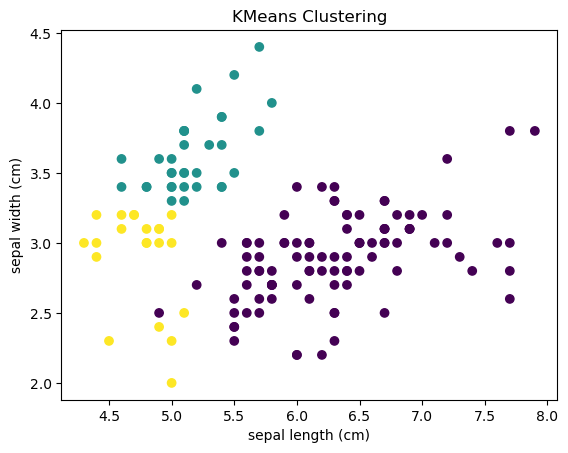

In [330]:
plt.scatter(data["sepal length (cm)"], data["sepal width (cm)"], c=kmeans.labels_) #c->This parameter is used to specify the colors of the points
plt.title("KMeans Clustering")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()

<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>

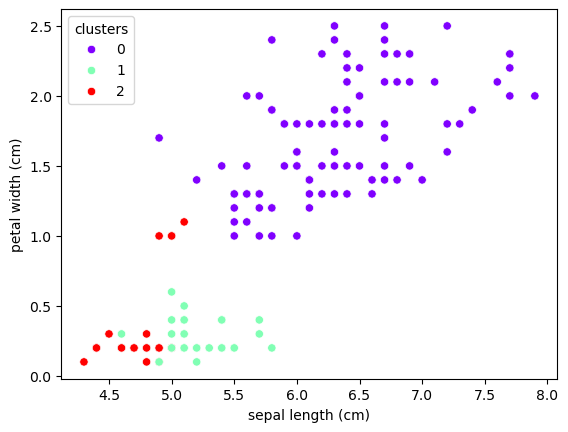

In [332]:
sns.scatterplot(x=data["sepal length (cm)"],y=data["petal width (cm)"],hue=data["clusters"],palette="rainbow")

In [ ]:
#2B) Hierarchical Clustering 

In [ ]:
# ***********Description:**********
# Hierarchical clustering is an unsupervised learning algorithm that builds a tree like hierarchy of clusters by merging or splitting existing clusters
#Hierarchical clustering builds a hierarchy of clusters using either agglomerative or divisive methods.
#Hierarchical clustering is a connectivity-based clustering model that groups the data points together that are close to each other based on the measure of similarity or distance. 
#The assumption is that data points that are close to each other are more similar or related than data points that are farther apart.
#A dendrogram, a tree-like figure produced by hierarchical clustering, depicts the hierarchical relationships between groups.
#Individual data points are located at the bottom of the dendrogram, while the largest clusters, which include all the data points, are located at the top.
#In order to generate different numbers of clusters, the dendrogram can be sliced at various heights.
#The dendrogram is created by iteratively merging or splitting clusters based on a measure of similarity or distance between data points.
#Clusters are divided or merged repeatedly until all data points are contained within a single cluster, or until the predetermined number of clusters is attained.

#Types of Hierarchical Clustering
#Agglomerative Clustering-
    #It is also known as the bottom-up approach or hierarchical agglomerative clustering (HAC). A structure that is more informative than the unstructured set of clusters returned by flat clustering. 
    #This clustering algorithm does not require us to prespecify the number of clusters.
    #Bottom-up algorithms treat each data as a singleton cluster at the outset and then successively agglomerate pairs of clusters until all clusters have been merged into a single cluster that contains all data. 
#Divisive clustering-
    #It is also known as a top-down approach. This algorithm also does not require to prespecify the number of clusters. 
    #Top-down clustering requires a method for splitting a cluster that contains the whole data and proceeds by splitting clusters recursively until individual data have been split into singleton clusters.

In [ ]:
#***********why Hierarchical clustering**********
# Hierarchical clustering is suitable for the Iris dataset because it can handle datasets with complex structures.
# The Iris dataset has 3 classes, which might have a hierarchical structure, making it suitable for Hierarchical clustering
#No Need to Predefine Clusters – 
    #Unlike KMeans, hierarchical clustering does not require specifying the number of clusters in advance, making it useful for exploratory data analysis.
#Captures Hierarchical Relationships – 
    #It builds a dendrogram that visually represents the nested clustering structure, helping to understand how clusters are formed at different distance levels.
#Works Well with Small Datasets –
    #Since hierarchical clustering is computationally expensive, it is best suited for smaller datasets like Iris (150 samples).
#Handles Non-Spherical Clusters – 
    #Unlike KMeans, hierarchical clustering does not assume spherical cluster shapes, making it more flexible when clusters have different densities or distributions.

In [336]:
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(Scaled_data)
data["H_Clusters"]=hierarchical_labels
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters,H_Clusters
0,5.1,3.5,1.4,0.2,1,1
1,4.9,3.0,1.4,0.2,2,1
2,4.7,3.2,1.3,0.2,2,1
3,4.6,3.1,1.5,0.2,2,1
4,5.0,3.6,1.4,0.2,1,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0
146,6.3,2.5,5.0,1.9,0,0
147,6.5,3.0,5.2,2.0,0,0
148,6.2,3.4,5.4,2.3,0,0


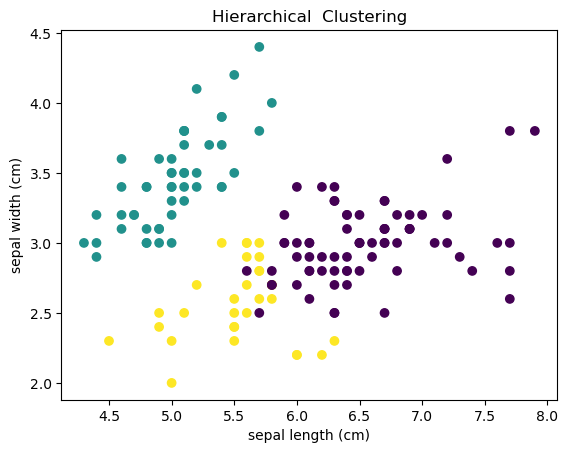

In [342]:
plt.scatter(data["sepal length (cm)"], data["sepal width (cm)"], c=hierarchical_labels) #c->This parameter is used to specify the colors of the points
plt.title("Hierarchical  Clustering")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()

<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>

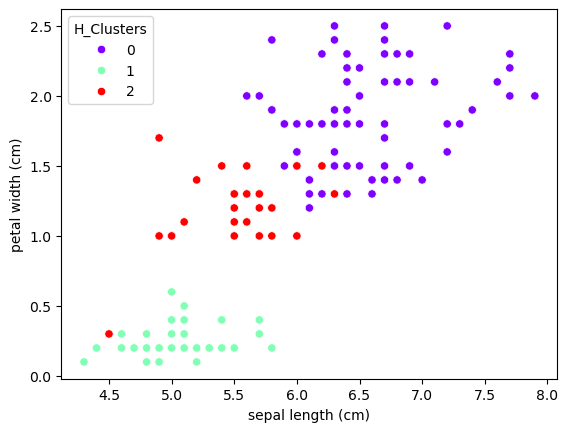

In [340]:
sns.scatterplot(x=data["sepal length (cm)"],y=data["petal width (cm)"],hue=data["H_Clusters"],palette="rainbow")

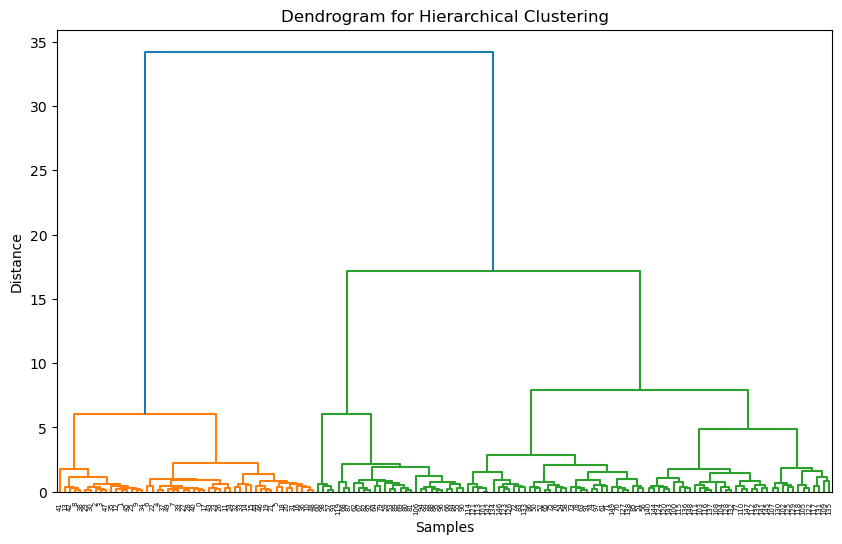

In [344]:
# Dendrogram
plt.figure(figsize=(10, 6))
linkage_matrix = linkage(data, method='ward')
dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()
